# 1.

In [27]:
#1.

#a)
experimento <- function(m){
    # Evento A: Sale cara
    A <- 1
    no.A <- 0
    return(sample(c(A, no.A), size=m, replace=T))
}

In [46]:
m <- 10
res.10 <- experimento(m)

In [47]:
prop <- mean(res.10)
names(prop) <- 'Frecuencia-relativa-de-A'
prop

Frecuencia-relativa-de-A 
                     0.6

In [48]:
#b)
m <- 100
res.100 <- experimento(m)

In [49]:
prop <- mean(res.100)
names(prop) <- 'Frecuencia-relativa-de-A'
prop

Frecuencia-relativa-de-A 
                    0.51

In [111]:
#c) Espero obtener un valor límite de 0.5, el promedio entre "muchos" ceros y unos en igual proporción.
ms <- c(10, seq(50, 1000, by=50))
ms

[1]   10   50  100  150  200  250  300  350  400  450  500  550  600  650  700
[16]  750  800  850  900  950 1000

In [112]:
frecuencias <- rep(NA, length(ms))
df <- data.frame(ms, frecuencias)
for(i in 1:length(ms)){
    df$frecuencias[i] <- mean(experimento(ms[i]))
}

In [113]:
library('ggplot2')

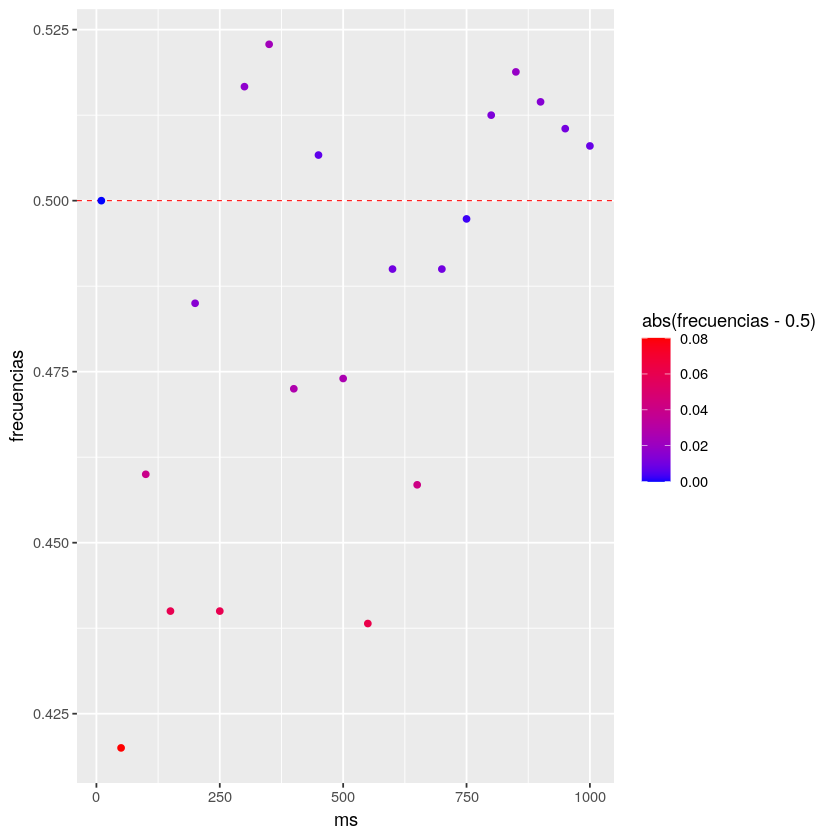

In [104]:
ggplot(df, aes(ms, frecuencias, col=abs(frecuencias-0.5))) +
    geom_hline(yintercept=0.5, linetype="dashed", 
                color = "red", size=0.3) +
    geom_point() +
    scale_color_gradient(low="blue", high="red")

In [145]:
#d
veces <- 10
frecuencias <- rep(NA, length(ms))
df <- data.frame(ms)
for(v in 1:veces){
    for(i in 1:length(ms)){
        frecuencias[i] <- mean(experimento(ms[i]))
    }

    
    df <- cbind(df, name=frecuencias)
    colnames(df)[v+1] <- paste('frec', v, sep='')
}

In [147]:
head(df)

ms,frec1,frec2,frec3,frec4,frec5,frec6,frec7,frec8,frec9,frec10
10,0.5000000,0.5000000,0.600,0.3000000,0.500,0.5000000,0.6000000,0.600,0.5000000,0.3000000
50,0.4800000,0.5200000,0.500,0.5200000,0.440,0.5400000,0.5400000,0.400,0.4800000,0.3800000
100,0.5900000,0.4400000,0.400,0.5500000,0.550,0.4700000,0.4800000,0.500,0.6000000,0.5200000
150,0.5733333,0.5266667,0.460,0.4666667,0.520,0.5066667,0.5466667,0.500,0.5333333,0.4133333
200,0.4950000,0.5750000,0.490,0.4850000,0.510,0.5150000,0.4900000,0.430,0.5550000,0.5750000
250,0.4800000,0.4560000,0.488,0.4840000,0.512,0.5480000,0.4960000,0.524,0.4960000,0.5000000


Junto todas las columnas de frecuencias en una sola (`frecuencia`), agregando otra columna con sus respectivas categorías (`rep`)

In [234]:
#install.packages('tidyr')
library(tidyr)

In [161]:
tall.df <- df %>% gather(key=rep, value=frecuencia, frec1:frec10)
head(tall.df)
tail(tall.df)

ms,rep,frecuencia
10,frec1,0.5000000
50,frec1,0.4800000
100,frec1,0.5900000
150,frec1,0.5733333
200,frec1,0.4950000
250,frec1,0.4800000


,ms,rep,frecuencia
205,750,frec10,0.5146667
206,800,frec10,0.5087500
207,850,frec10,0.4929412
208,900,frec10,0.5088889
209,950,frec10,0.5136842
210,1000,frec10,0.4970000


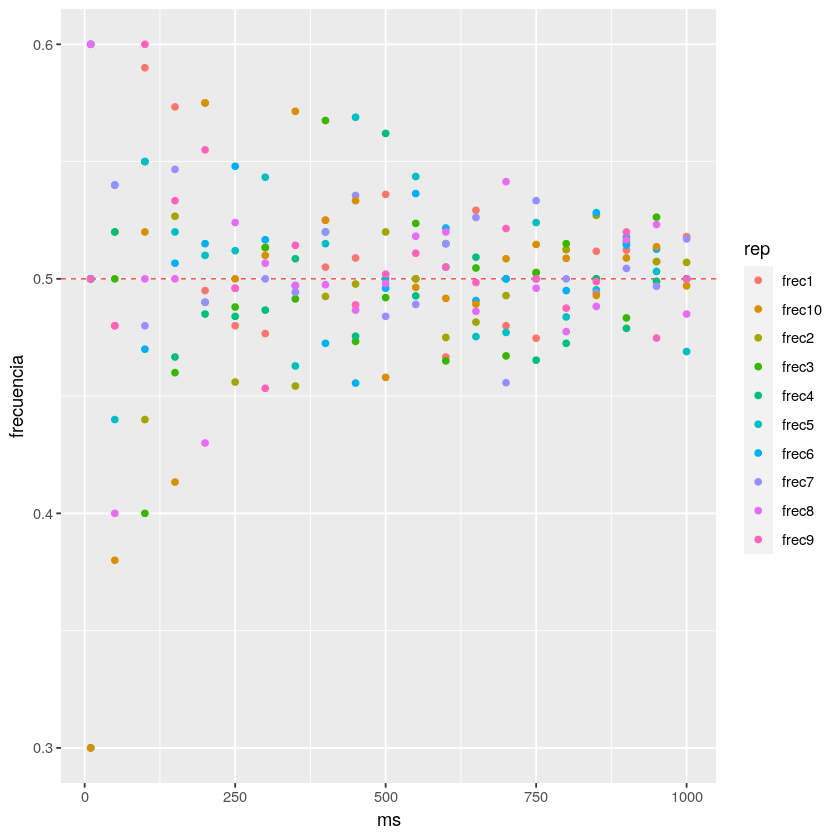

In [165]:
ggplot(tall.df, aes(ms, frecuencia, col=rep)) +
    geom_hline(yintercept=0.5, linetype="dashed", 
                color = "red", size=0.3) +
    geom_point()

Observamos como las diferentes repeticiones de experimentos "se mezclan" de una forma uniforme alrededor de la línea horizontal en 0.5, con mayor variabilidad para una cantidad de tiradas pequeña, y más concentrados a medida que m se acerca a 1000.

Usando colores relativos a la distancia de la media ideal (en el límite):

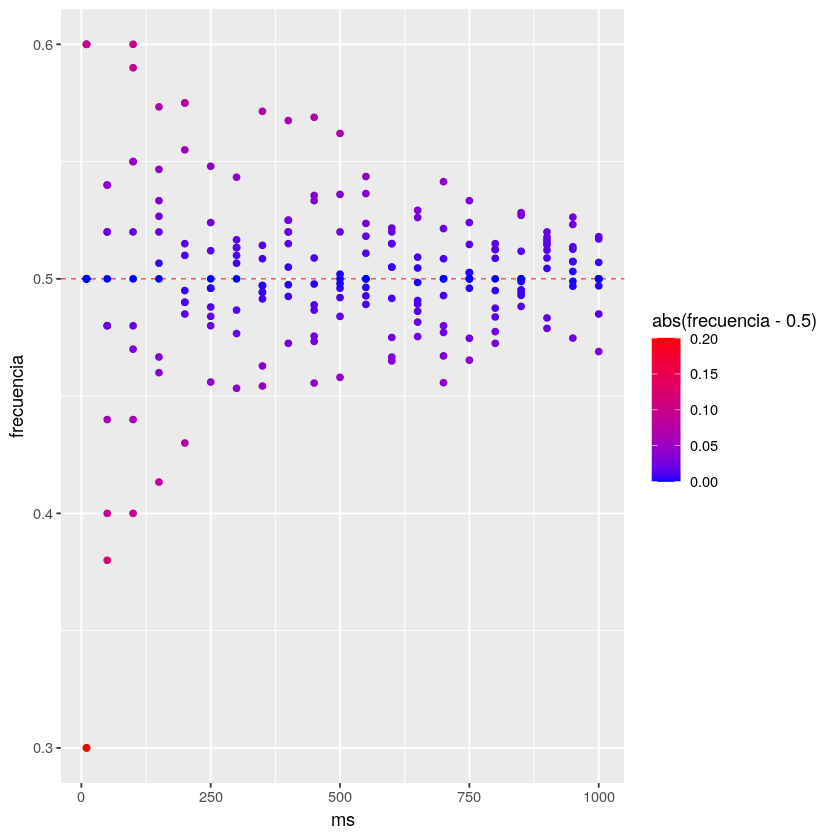

In [162]:
ggplot(tall.df, aes(ms, frecuencia, col=abs(frecuencia-0.5))) +
    geom_hline(yintercept=0.5, linetype="dashed", 
                color = "red", size=0.3) +
    geom_point() +
    scale_color_gradient(low="blue", high="red")

Aprovechando que no estamos presos en Dinamarca sino delante de poderosisimos simuladores universales:

In [199]:
#d
veces <- 100
ms <- c(seq(10,50,10), seq(50, 10000, by=50))
frecuencias <- rep(NA, length(ms))
df <- data.frame(ms)
for(v in 1:veces){
    for(i in 1:length(ms)){
        frecuencias[i] <- mean(experimento(ms[i]))
    }
    df <- cbind(df, name=frecuencias)
    colnames(df)[v+1] <- paste('frec', v, sep='')
}

In [200]:
tall.df <- df %>% gather(key = rep, value = frecuencia, frec1:frec10)

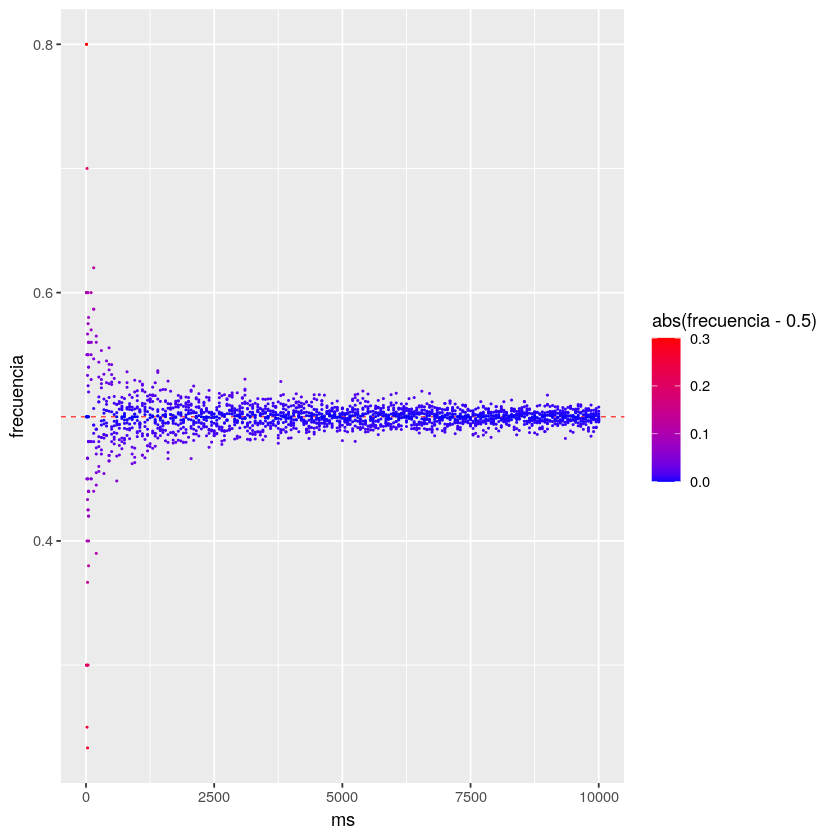

In [201]:
ggplot(tall.df, aes(ms, frecuencia, col=abs(frecuencia-0.5))) +
    geom_hline(yintercept=0.5, linetype="dashed", 
                color = "red", size=0.3) +
    geom_point(size=0.2, alpha = 10/10) +
    scale_color_gradient(low="blue", high="red")

# 2.

In [202]:
#2.
tabla <- data.frame(biologia=c(0.15, 0.10),fisica=c(0.06,0.12),
                    computacion=c(0.12,0.15),quimica=c(0.05,0.10),
                    matematica=c(0.10,0.05))
rownames(tabla)<- c('femenino','masculino')

In [203]:
tabla

,biologia,fisica,computacion,quimica,matematica
femenino,0.15,0.06,0.12,0.05,0.10
masculino,0.10,0.12,0.15,0.10,0.05


In [208]:
#a) de g ́enero femenino y de Biolog ́ıa.
p.a <- tabla['femenino', 'biologia']
p.a 

[1] 0.15

In [209]:
#b) de g ́enero fenenino.
p.b <- sum(tabla['femenino',])
p.b

[1] 0.48

In [210]:
#c) de Biolog ́ıa.
p.c <- sum(tabla[,'biologia'])
p.c

[1] 0.25

In [212]:
#d) de Biolog ́ıa o de g ́enero femenino.
p.d <- p.c + p.b - p.a
p.d

[1] 0.58

In [214]:
#e) de Biolog ́ıa sabiendo que es de g ́enero femenino.
p.e <- tabla['femenino', 'biologia'] / sum(tabla['femenino',])
p.e

[1] 0.3125

In [218]:
#f ) ¿Es m ́as probable que un estudiante sea Bi ́ologo o F ́ısico?
p.biologo <- sum(tabla[,'biologia'])
p.fisico  <- sum(tabla[,'fisica'])
names(p.biologo) <- 'p.biologo'
names(p.fisico)  <- 'p.fisico'
p.biologo
p.fisico

p.biologo 
     0.25

p.fisico 
    0.18

In [ ]:
Es más probable que sea biologo.

In [219]:
#g) Sabiendo que un estudiante es de g ́enero masculino, ¿es m ́as probable que un estudiante sea Bi ́ologo o F ́ısico?
p.m.biologo <- tabla['masculino', 'biologia'] / sum(tabla['masculino',])
p.m.fisico <- tabla['masculino', 'fisica'] / sum(tabla['masculino',])
names(p.m.biologo) <- 'p.masc.biologo'
names(p.m.fisico)  <- 'p.masc.fisico'
p.m.biologo
p.m.fisico

p.masc.biologo 
     0.1923077

p.masc.fisico 
    0.2307692

Sabiendo que es de género masculino, es más probable que sea físico.

#h) Comparar los dos  ́ultimos items. Observar c ́omo la cosa cambia cuando tenemos informacion adicional....

Es un punto bastante interesante, y a pesar de conocer el concepto de probabilidad condicional desde hace tiempo, todavía me sorprende e intrigan sus posibles interpretaciones y la relación con la ecuación que la caracteriza.

$$\large P(A|B) = \frac{P(A \cap B)}{P(B)}$$

Una visualización que me gusta es ver la probabilidad de cada evento como un diagrama de Venn.

Agregar información extra ("*dado* $B$") es restringirnos a un subespacio del espacio muestral, donde solo una fracción de los eventos totales son partícipes: los que están en la intersección $A\cap B$.

Pero al ser $B$ conocida, necesitamos reescalar la probabilidad de la interseccióna un espacio mayor, dividiéndolo por un número menor a 1: $P(B)$

# 3.

In [222]:
#3.
#intensidades
p.baja  <- 0.2
p.media <- 0.55
p.alta  <- 1 - media - baja

In [221]:
p.hiper.baja  <- 0.7
p.hiper.media <- 0.5
p.hiper.alta  <- 0.2

#a)

$H$: Es hipertenso

$B/M/A$: Entrena con intensidad $B$aja/$M$edia/$A$lta

### Teorema: Ley de Probabilidad Total:

$$\large P(H) = P(H|B) P(B) + P(H|M) P(M) + P(H|A) P(A)$$


In [224]:
p.hiper <- p.hiper.baja * p.baja + p.hiper.media * p.media + p.hiper.alta * p.alta
p.hiper

[1] 0.465

La probabilidad de que un adulto mayor elegido al azar sea hipertenso es de 46.5%

#b
### Teorema de Bayes

$$\large P(B|H) =  \frac{P(H|B) P(B)}{P(H)}$$

In [226]:
p.baja.dado.hiper <- p.hiper.baja * p.baja / p.hiper
p.baja.dado.hiper

[1] 0.3010753

La probabilidad de que un adulto mayor practique actividad física con baja intensidad sabiendo que es hipertenso es del 30.11%

# 4.

$E$: El paciente está enfermo

$+/-$: Resultado del test positivo/negativo

Sensibilidad $P(+ | E) = 0.94$

Especificidad $P(- | E^c) = 0.9$

Usando Bayes
$$P(E | +) = \frac{P(+ | E)P(E)}{P(+)}$$

Donde
$P(+) = P(+|E)\ P(E) + P(+|E^c) \  P(E^c)$

In [228]:
sensibilidad  <- 0.94
especificidad <- 0.9
prevalencia   <- 0.03

p.E <- prevalencia
p.posi.dado.E <- sensibilidad
p.posi.dado.noE <- 1 - especificidad
p.posi <- p.posi.dado.E * p.E + p.posi.dado.noE * (1-p.E)

In [230]:
p.E.dado.posi <- p.posi.dado.E * p.E / p.posi
p.E.dado.posi

[1] 0.2252396

La probabilidad de estar enfermo dado que el resultado del test dio positivo, es de 22.53%

# 5.

## a.

$A \perp B$

$p(A \cap B) = p(A).p(B)$

In [1]:
# Datos
p <- 0.72
secue <- c(1,1,1,0,1)

In [6]:
exitos <- sum(secue == 1)
fracas <- sum(secue == 0)
proba  <- p^exitos * (1-p)^fracas
proba

[1] 0.0752468

## b.

In [83]:
n <- 5
p <- 0.8

In [84]:
toBin <- function(num, long){
    d <- num
    r <- num
    binary <- c()
    while(d > 1){
        r <- d%%2
        d <- d%/%2
        binary <- c(binary, r)
    }
    binary <- c(binary, d)
    # Relleno con ceros
    while(length(binary)<long){
        binary <- c(binary, 0)
    }
    binary <- rev(binary)
   
    return(binary)
}

In [85]:
espacio <- data.frame(e1=rep(0, 2^n), e2=rep(0, 2^n), e3=rep(0, 2^n), e4=rep(0, 2^n), e5=rep(0, 2^n))
for(i in 1:2^n){
    espacio[i,] <- toBin(i-1, n)
}
espacio

e1,e2,e3,e4,e5
0,0,0,0,0
0,0,0,0,1
0,0,0,1,0
0,0,0,1,1
0,0,1,0,0
0,0,1,0,1
0,0,1,1,0
0,0,1,1,1
0,1,0,0,0
0,1,0,0,1


In [86]:
length(espacio[,1])

[1] 32

### b.2)

In [87]:
espacio <- cbind(espacio, proba=rep(NA, 2^n))

In [90]:
for(i in 1:2^n){
    exitos <- sum(espacio[i,1:n]==1)
    fracas <- sum(espacio[i,1:n]==0)
    espacio[i, 'proba'] <- p^exitos * (1-p)^fracas
}
espacio

e1,e2,e3,e4,e5,proba
0,0,0,0,0,0.00032
0,0,0,0,1,0.00128
0,0,0,1,0,0.00128
0,0,0,1,1,0.00512
0,0,1,0,0,0.00128
0,0,1,0,1,0.00512
0,0,1,1,0,0.00512
0,0,1,1,1,0.02048
0,1,0,0,0,0.00128
0,1,0,0,1,0.00512


In [92]:
table(espacio$proba)


0.00032 0.00128 0.00512 0.02048 0.08192 0.32768 
      1       5      10      10       5       1 

# Segunda Parte